## Hierarchial Clustering: 
Clustering algorithms group a set of data points that are coherent internally, but clearly different from each other externally.  entities within a cluster should be as similar as possible and entities in one cluster should be as dissimilar as possible from entities in another i.e, entities within a cluster should be as similar as possible and entities in one cluster should be as dissimilar as possible from entities in another.

- Namely of of 2 types, Agglomerative and Divisive.

### 1. Agglomerative: 
An agglomerative approach begins with each observation in a distinct (singleton) cluster, and successively merges clusters together until a stopping criterion is satisfied. Also called bottom-up approach. Here we start with each data point as its own cluster and then combine clusters based on some similarity measure.

### 2. Divisive: 
A divisive method begins with all patterns in a single cluster and performs splitting until a stopping criterion is met.

### Steps for Agglomerative Clustering:
- 1. Make each data point a single point cluster-- That forms N cluster.
- 2. Take two closest data points and make them one cluster--- That forms N-1 cluster.
- 3. Again take two closest cluster and make them one cluster--- That forms N-2 cluster.
- 4. Repeat step 3 untill there is only one cluster.
- 5. Finish
- **NOTE:** Calculation of Closest cluster is important for algorithm and is calculated using,
    - **Euclidean Dist.:** <Img src= './image/15.1 Image a.png' width='40%' height='40%'/>
    - which can be calculated between two clusters as
    - Linkage optn 1. Nearest points of two cluster
    - Linkage optn 2. Farthest points of two cluster
    - Linkage optn 3. Average of points of two cluster
    - Linkage optn 4. Centroids of two cluster.

### Dendograms: 
For optimal number of clusters.
- In HC we categorize the objects into a hierarchy similar to a tree-like diagram called a dendrogram. 
- The distance of split or merge (called height) is shown on the y-axis of the dendrogram.
- After making dendogram we look for the largest distance that we can make vertically without crossing any horizontal line.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.shape

(200, 5)

In [8]:
x= dataset.iloc[:, [3, 4]].values

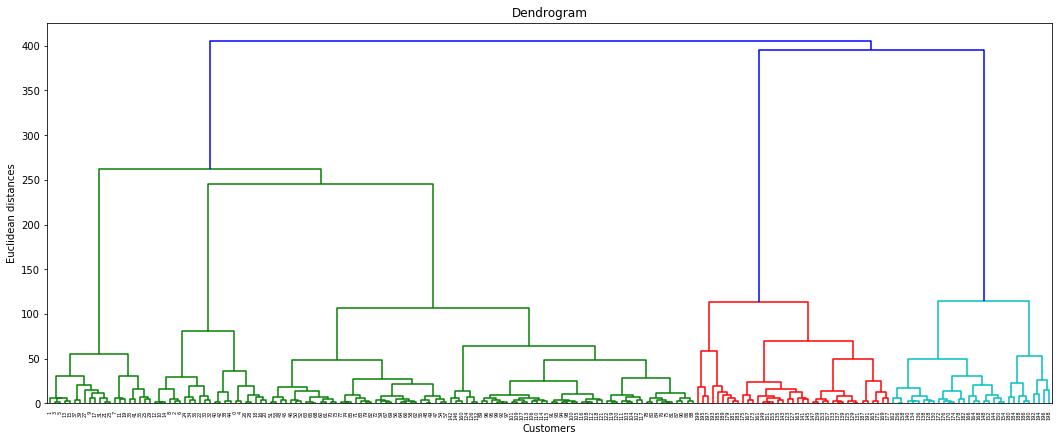

In [9]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(18,7))
dendrogram= sch.dendrogram(sch.linkage(x, method= 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Ward method tries to minimize the variance within each cluster. 

In [12]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters= 5, affinity= 'euclidean', linkage= 'ward')
y_hc= hc.fit_predict(x)

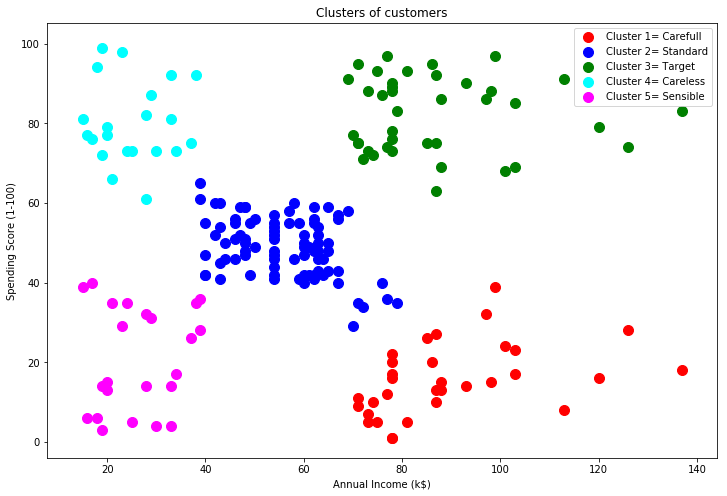

In [15]:
# Visualising the clusters
plt.figure(figsize=(12,8))
plt.scatter(x[y_hc== 0, 0], x[y_hc== 0, 1], s= 100, c= 'red', label= 'Cluster 1= Carefull')
plt.scatter(x[y_hc== 1, 0], x[y_hc== 1, 1], s= 100, c= 'blue', label= 'Cluster 2= Standard')
plt.scatter(x[y_hc== 2, 0], x[y_hc== 2, 1], s= 100, c= 'green', label= 'Cluster 3= Target')
plt.scatter(x[y_hc== 3, 0], x[y_hc== 3, 1], s= 100, c= 'cyan', label= 'Cluster 4= Careless')
plt.scatter(x[y_hc== 4, 0], x[y_hc== 4, 1], s= 100, c= 'magenta', label= 'Cluster 5= Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# NOTE: K-Means performs better than Hierarchical Clustering on large datasets.